In [19]:
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment, AlignInfo
from Bio import SeqIO, AlignIO, Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor

In [30]:
record = SeqIO.parse(open("c11orf30.fasta"), format = "fasta")
lista_seqs = [c.seq for c in record]
seq_1 = lista_seqs[0]
seq_2 = lista_seqs[1]
seq_3 = lista_seqs[2]
# seq_4 = lista_seqs[3]


seqr_1 = SeqRecord(seq_1, id = "seq1")
seqr_2 = SeqRecord(seq_2, id = "seq2")
seqr_3 = SeqRecord(seq_3, id = "seq3")
# seqr_4 = SeqRecord(seq_4, id = "seq4")

alin = MultipleSeqAlignment([seqr_1,seqr_2,seqr_3])

#Guardar ficheiros
save_file = open("my_alignment_RE.fasta", "w")
save_file.write(format(alin, 'fasta')) 
save_file.close()

#Ver alinhamentos
alignment= open("my_alignment_RE.fasta")
alignment_records = AlignIO.parse(alignment, 'fasta')
for record in alignment_records:
    print(record)

Alignment with 3 rows and 1355 columns
MPVVWPTLLDLSRDECKRILRKLELEAYAGVISALRAQGDLTKE...ERS seq1
MPVVWPTLLDLSRDECKRILRKLELEAYAGVISALRAQGDLTKE...ERS seq2
MPVVWPTLLDLSRDECKRILRKLELEAYAGVISALRAQGDLTKD...Q-- seq3


In [32]:
calculator = DistanceCalculator('blosum62')
dm = calculator.get_distance(record)
print(f'Distance Matrix: \n {dm} \n ################################')    # ver a questao #

#arvore p/UPGMA ii. Neighbor Joining iii____guardado no formato “newick”

contructor = DistanceTreeConstructor()

upgma_tree = contructor.upgma(dm)
print(f'UPGMA Tree: \n {upgma_tree} \n ################################')

nj_tree = contructor.nj(dm)
print(f'Neighbor Joining Tree: \n {nj_tree} \n ################################')

Phylo.write(upgma_tree, 'upgma_tree.nwk', 'newick')
Phylo.write(nj_tree, 'nj_tree.nwk', 'newick')

Distance Matrix: 
 seq1	0
seq2	0.045249597423510424	0
seq3	0.3405443126308444	0.3457926716995029	0
	seq1	seq2	seq3 
 ################################
UPGMA Tree: 
 Tree(rooted=True)
    Clade(branch_length=0, name='Inner2')
        Clade(name='seq3')
        Clade(name='Inner1')
            Clade(name='seq2')
            Clade(name='seq1') 
 ################################
Neighbor Joining Tree: 
 Tree(rooted=False)
    Clade(branch_length=0, name='Inner1')
        Clade(name='seq1')
        Clade(name='seq2')
        Clade(name='seq3') 
 ################################


1

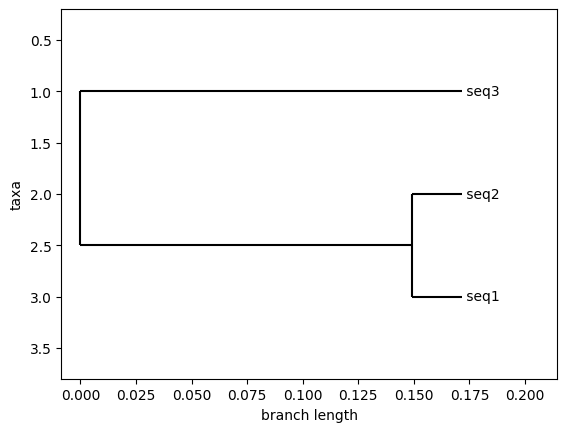

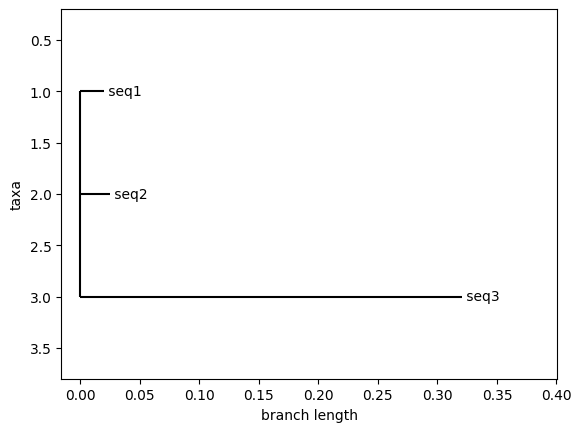

In [33]:
#ler arvores

upgmatree = Phylo.read('upgma_tree.nwk', 'newick')
njtree = Phylo.read('nj_tree.nwk', 'newick')

for clade in upgmatree.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

for clade in njtree.find_clades():
    if "Inner" in clade.name:
        clade.name = ""

Phylo.draw(upgmatree)
Phylo.draw(njtree)
